# Jorge Leonardo López Agredo
## cod: 2218061 
### Modelado Matemático II. Prof: David Sierra

En el presente Notebook se presentan los códigos básicos para poder ejecutar los **esquemas de diferencias finitas (EDF)** por **el método $\theta$ para la ecuación de onda**.

Los problemas a estudiar es:
# Condiciones de contorno Direchlet homogéneas, material homogéneo.
$$\begin{cases}
\begin{matrix}
u_{tt}-ku_{xx}=0\ \text{para} & a<x<b   \cr
u(0)=u_0(x)\ \text{para} & u_0 \in \mathbb{R}\cr
u_t(0)=0\ \text{para} & a<x<b\end{matrix} \cr
u(a)=0, \hspace{3mm}u(b)=0 \ \text{para} \ t>0.
\end{cases}
$$


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import diags
%matplotlib inline


In [13]:
def MetodoTheta(M,N,theta=0.5):
    a= 0
    b= 1
    L= b-a# longitud de la barra (m)
    k= 0.2 #cuadrado de la Velocidad de la onda(m^2/s^2)
    

    #Mallado
    m=M+1
    h=L/m
    Xamp = np.linspace(a,b,m+1)
    x = Xamp[1:-1]
    #condición inicial y de frontera
    Uinic = lambda x : np.sin(2*np.pi*(x-a)/L)
    #Uinic = lambda x : x*(L-x)
    Ua= lambda t : 0.*t+0
    Ub= lambda t : 0.*t+0
    U=Uinic(x)
    Uamp = np.zeros(m+1)
    Uamp[0] = Ua(0)# Condiciones variables en la frontera, dependiendo del tiempo
    Uamp[-1] = Ub(0)# Condiciones variables en la frontera, dependiendo del tiempo
    Uamp[1:-1] = U
    V = Uamp.copy()#Posición  de la onda para el tiempo t = dt.
    #paso en el tiempo
    if theta>=0.25 and theta<=0.5:
        dt = 0.1 #Definimos sin restricciones
    else:
        M=1.
        dt = h*np.sqrt(M/(k*(1-4*theta)))#Definimos bajo el máximo de la condición de estabilidad M=1.
        #dt = h*np.sqrt(M/((1-4*theta)))#Definimos bajo el máximo de la condición de estabilidad M=1.
    #definiendo la matriz A
    
    lamb = k*(dt/h)**2
    A = diags([-theta*lamb, 1+2*theta*lamb  ,-theta*lamb], [-1, 0, 1], shape=(m-1, m-1)).toarray()
    #definiendo la matriz B
    B = diags([(1-2*theta)*lamb, 2-2*(1-2*theta)*lamb  ,(1-2*theta)*lamb], [-1, 0, 1], shape=(m-1, m-1)).toarray()
    #definiendo la matriz C
    C = diags([theta*lamb, -1-2*theta*lamb  ,theta*lamb], [-1, 0, 1], shape=(m-1, m-1)).toarray()
       
    #graficando soluciones en cada paso de tiempo    
    plt.figure(figsize=(7,5))
    plt.plot(Xamp,Uamp, label = 'Onda inicial')
    tm=dt
    for t in range(N):
        tm += dt
        U = np.dot(np.dot(np.linalg.inv(A),B),
                   V[1:-1])+np.dot(np.dot(np.linalg.inv(A),C),Uamp[1:-1])  # A*U_j+1=B*U_j+C*U_j-1
        Vcop =V.copy()
        V[0] = Ua(tm)
        V[-1] = Ub(tm)
        V[1:-1] = U
        Uamp = Vcop.copy()
        plt.plot(Xamp,V) 
    plt.legend()
    plt.title(f'Método theta CC Newmann no Homogéneas')
    plt.show()



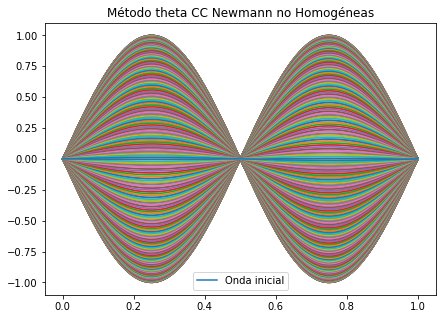

In [9]:
MetodoTheta(400,500,0.)

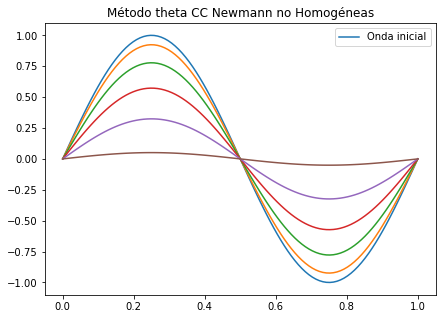

In [10]:
MetodoTheta(100,5,0.5)

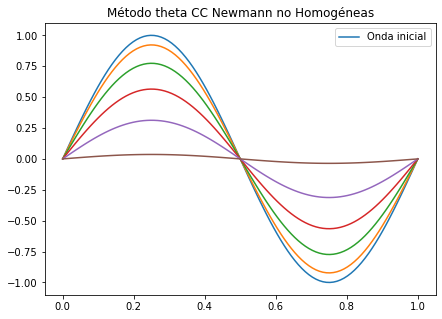

In [14]:
MetodoTheta(100,5,0.25)

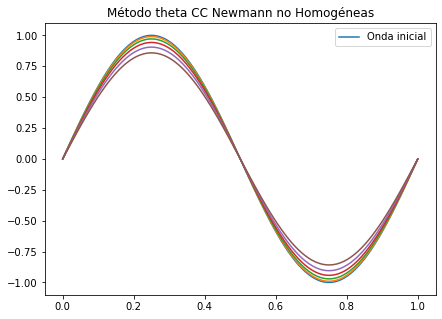

In [12]:
MetodoTheta(100,5,0.15)

Para ver la teoría de la solución analílitca, $u(x,t)=0.5\left[u_0(x+ct)+u_0(x-ct)\right]$, donde $c=\sqrt{k}$, ver  por ejemplo [aquí](https://es.wikipedia.org/wiki/Ecuaci%C3%B3n_de_onda)